In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt # visualizstion library

from sklearn.datasets import fetch_california_housing # task is to predict house price
from sklearn.model_selection import train_test_split # split the data into two chunks

In [4]:
dataset = fetch_california_housing()

In [6]:
dataset['data'].shape

(20640, 8)

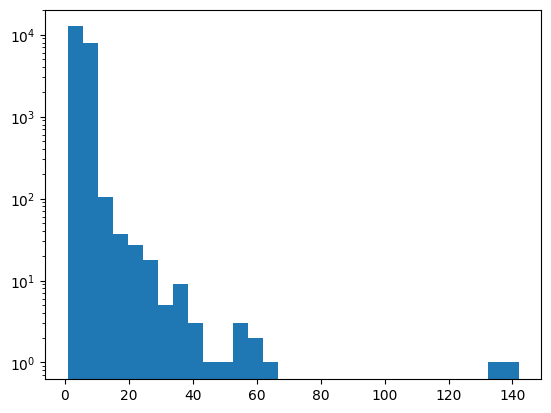

In [11]:
dataset['feature_names']
plt.hist(dataset['data'][:,2], bins=30)
plt.yscale('log')

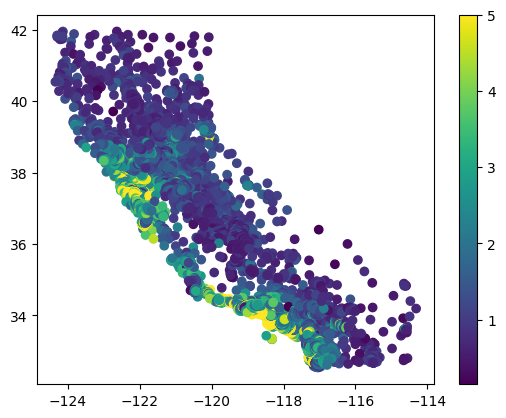

In [12]:
plt.scatter(dataset['data'][:,-1],
            dataset['data'][:,-2],
            c = dataset['target'])
plt.colorbar()

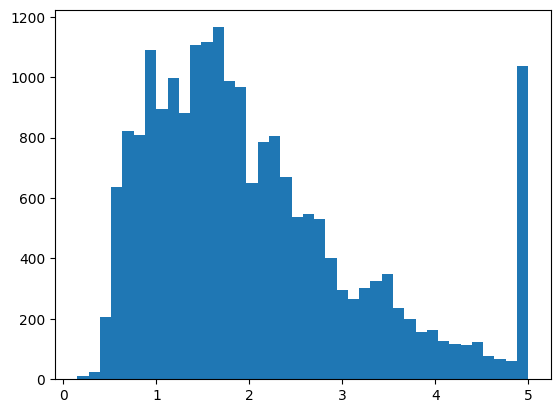

In [14]:
plt.hist(dataset['target'], bins=40);

In [15]:
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(15480, 8)

In [16]:
def build_model():
  xin = tf.keras.layers.Input(shape=(8,))
  x1 = tf.keras.layers.Dense(64, activation='swish')(xin)
  x2 = tf.keras.layers.Dense(64, activation='swish')(x1)
  xout = tf.keras.layers.Dense(1)(x2)

  return tf.keras.Model(inputs=xin, outputs=xout)

build_model().summary()

# this models has 8 inputs, two hidden layers each with 64 neurons, and a single output

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)